# Tight-binding bandstructure of TMDC materials
The band structure is computed from the tight-binding model with parameters and states as given in the paper <div class="csl-entry">Fang, S., Kuate Defo, R., Shirodkar, S. N., Lieu, S., Tritsaris, G. A., &#38; Kaxiras, E. (2015). Ab initio tight-binding Hamiltonian for transition metal dichalcogenides. <i>Physical Review B - Condensed Matter and Materials Physics</i>, <i>92</i>(20). https://doi.org/10.1103/PhysRevB.92.205108</div>

In [1]:
import numpy as np
import pandas as pd
from quantum.tbm.tbtmdc import *
from quantum.utils import plotting as PLT
from math import pi, sqrt
from matplotlib import pyplot as plt
%matplotlib inline

def showmatrix(H,i0=0):
    t=pd.DataFrame(H)
    t.index = [i0 + i for i in t.index]
    t.columns = [i0 + i for i in t.columns]
    display(t.style.applymap(lambda v : 'opacity: 10%;' if np.abs(v) < 1e-6 else None))

In [2]:
data   = load_tbtable('TBParams_TMDC.csv')
Hterms = tbtable_hterms(data, 'MoS2')
Hterms = symterms(Hterms)
(a1,a2), (b1,b2), (M,K) = lattice_vectors(Hterms)
dh = hopping_vectors(Hterms)
H = Hamiltonian([0,0], Hterms)
print(*['%.4f' % (e) for e in np.linalg.eigvalsh(H)],sep=' ')
#showmatrix(H.real,i0=1)

-6.0317 -2.8009 -2.8009 -1.8189 -1.4133 -1.4133 0.0618 2.7018 2.7018 2.8859 2.8859


In [3]:
kvec = b1/2
H = Hamiltonian(kvec,Hterms)
Hcomp = HamiltonianComp(Hterms)
dhop = hopping_vectors(Hterms)
Ht = Hamiltonian_from_comp(Hcomp,dhop,kvec)
print(np.abs(Ht-H).max())

2.220446049250313e-16


## Bands

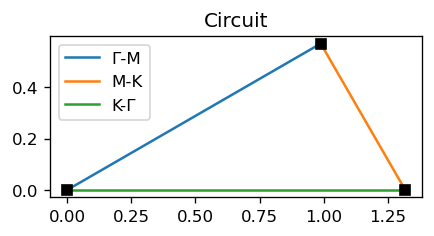

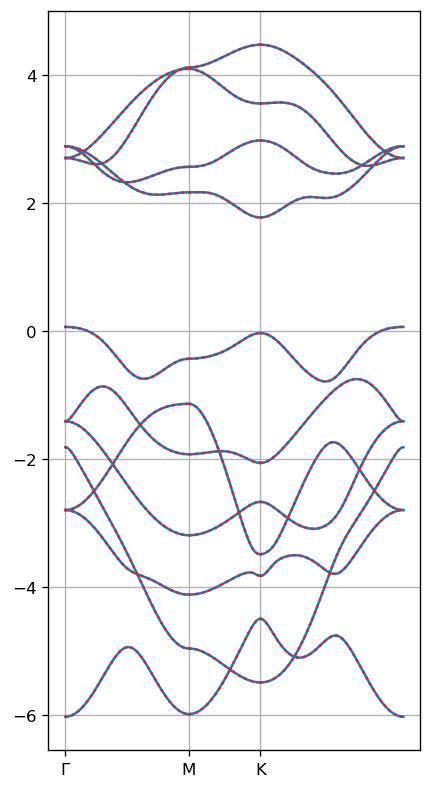

In [4]:
u = np.linspace(0,1,151)
kv1 = u[:,None] * M
kv2 = u[:,None] * K + M * (1-u[:,None])
kv3 = (1-u[:,None]) * K 
q1 = np.sqrt((kv1**2).sum(axis=1))
q2 = np.sqrt(( (kv2-kv2[0]) **2).sum(axis=1))
q3 = np.sqrt(( (kv3-kv3[0]) **2).sum(axis=1))

data   = load_tbtable('TBParams_TMDC.csv')
Hterms = tbtable_hterms(data, 'MoS2')

Hcomp = HamiltonianComp(Hterms)
dhop = hopping_vectors(Hterms)

def energy(kv):
    return np.linalg.eigvalsh(Hamiltonian(kv,Hterms))

def energyComp(kv):
    H = Hamiltonian_from_comp(Hcomp,dhop,kv)
    return np.linalg.eigvalsh(H)

fig,ax=plt.subplots(figsize=(4,4),dpi=120)
ax.set_title('Circuit')
ax.plot(*kv1.T,label='Γ-M')
ax.plot(*kv2.T,label='M-K')
ax.plot(*kv3.T,label='K-Γ')
ax.plot(0,0,'sk')
ax.plot(M[0],M[1],'sk')
ax.plot(K[0],K[1],'sk')
ax.set_aspect('equal')
ax.legend()

fig, ax = plt.subplots(figsize=(4,8), dpi=120)

for energyf,style in zip([energy, energyComp],['-tab:blue',':tab:red']):
    E1 = np.vstack([energyf(kv) for kv in kv1])
    E2 = np.vstack([energyf(kv) for kv in kv2])
    E3 = np.vstack([energyf(kv) for kv in kv3])
    kwargs = dict(linestyle=style[0],color=style[1:])
    ax.plot(q1, E1 ,**kwargs)
    ax.plot(q1[-1] + q2, E2,**kwargs)
    ax.plot(q1[-1] + q2[-1]+q3, E3, **kwargs)

ax.set_xticks([0,q1[-1],q2[-1]+q1[-1]])
ax.set_xticklabels(['Γ','M','K'])
ax.grid(True)
